In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py   
from os import system,remove 

/tmp/ipykernel_925027/82509836.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


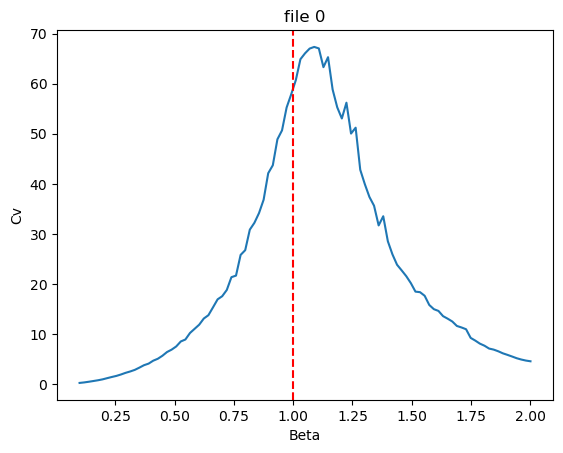

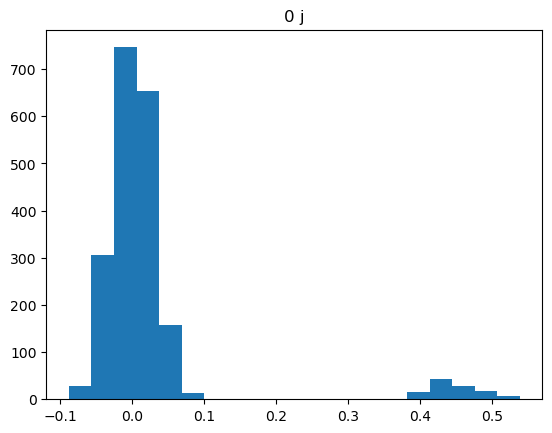

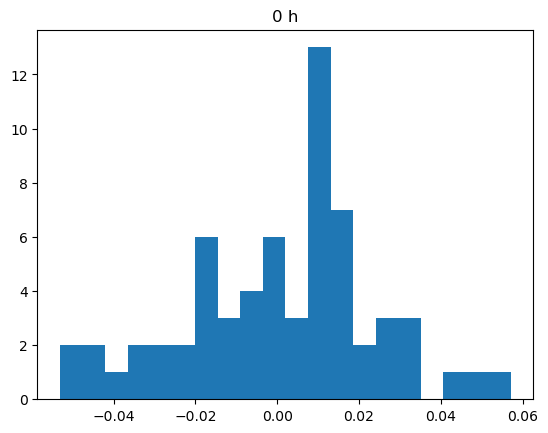

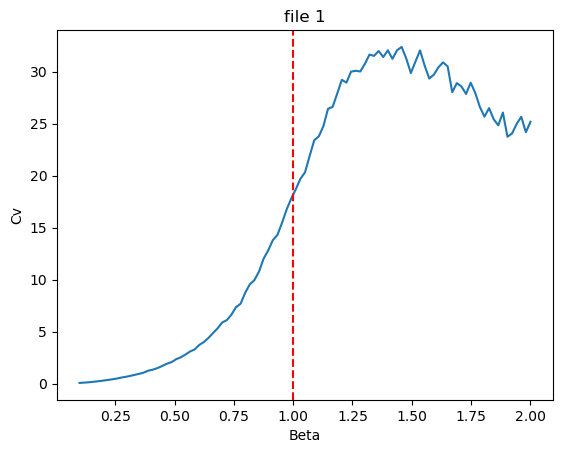

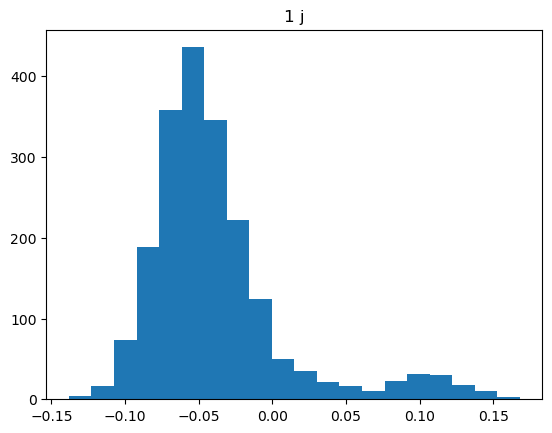

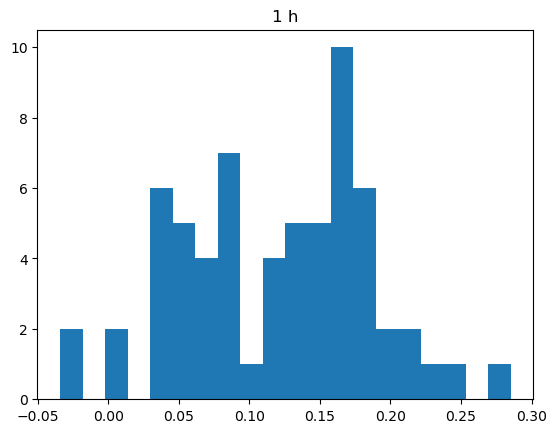

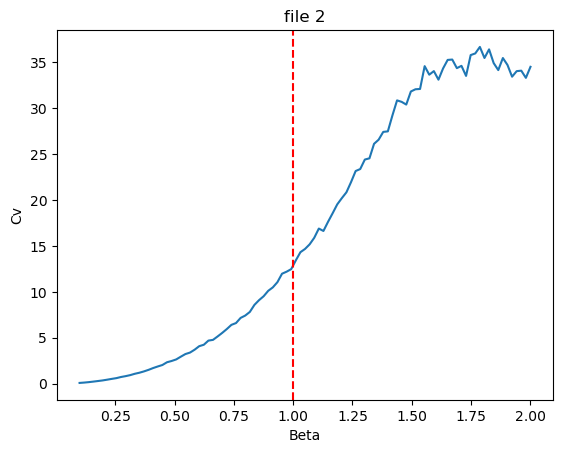

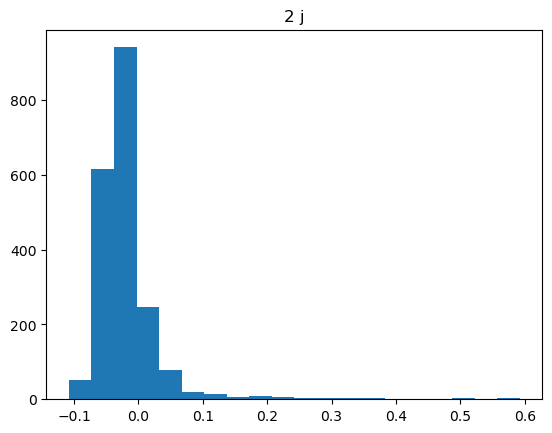

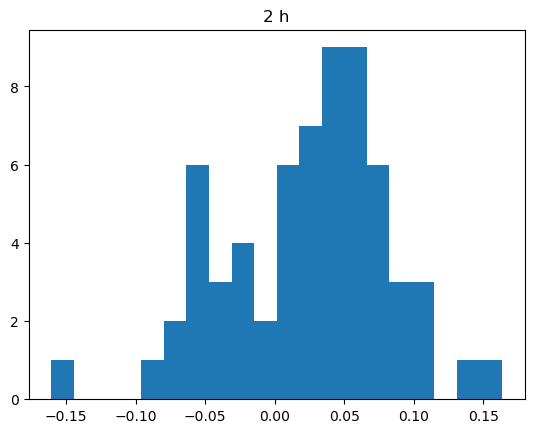

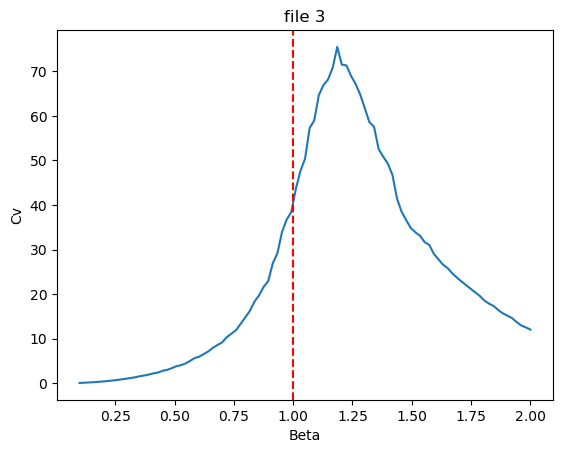

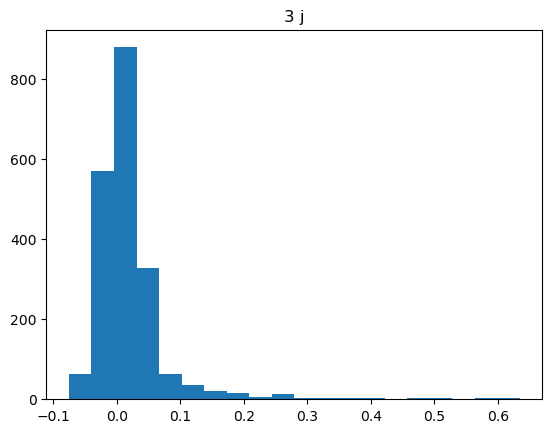

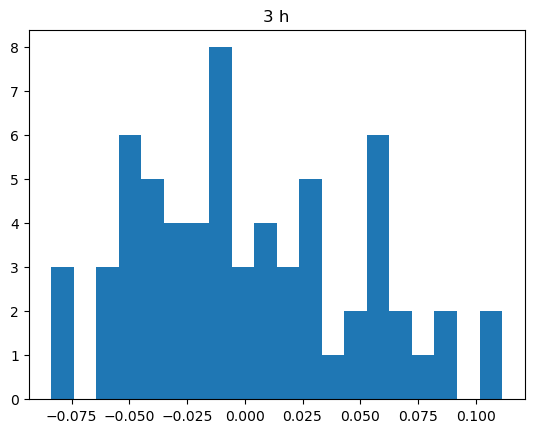

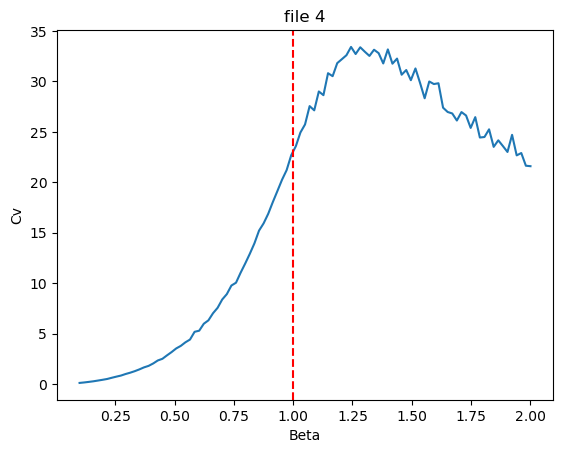

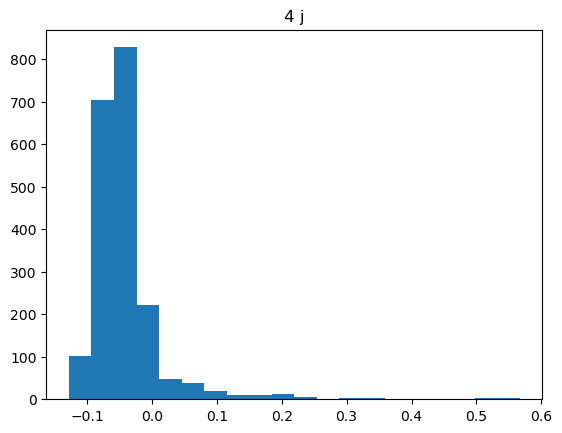

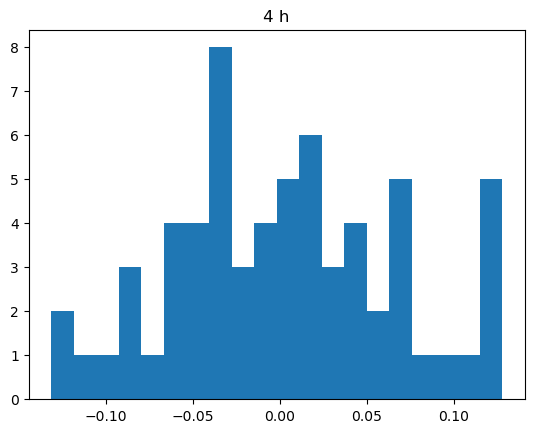

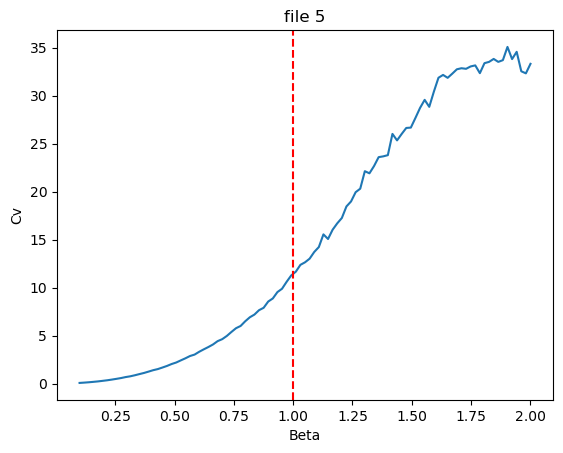

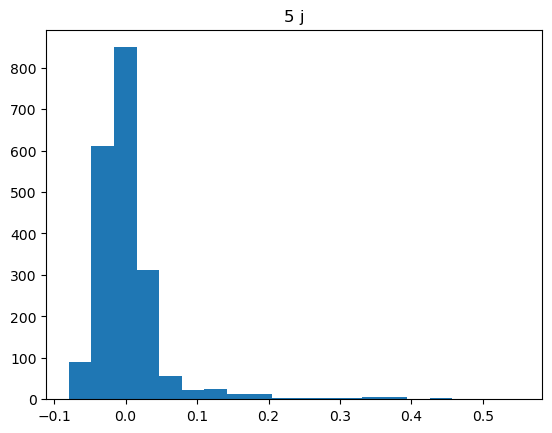

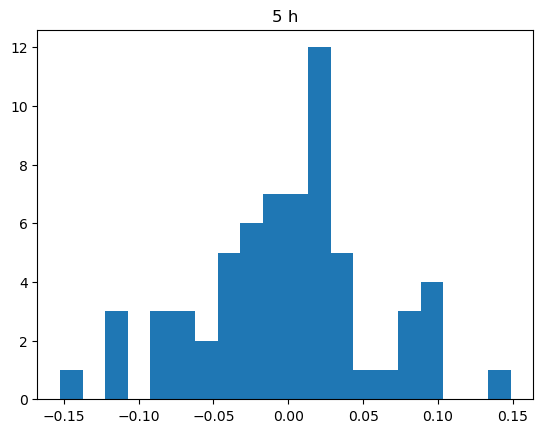

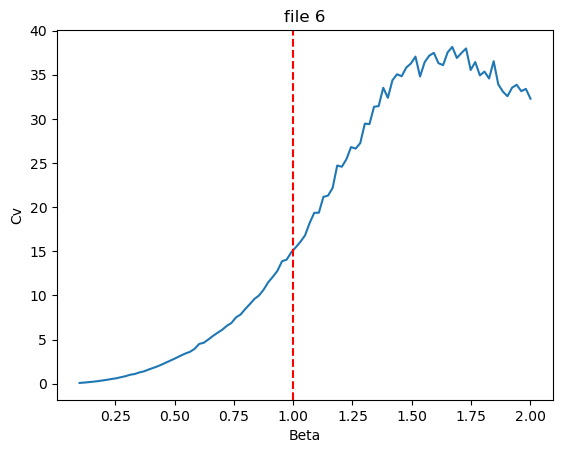

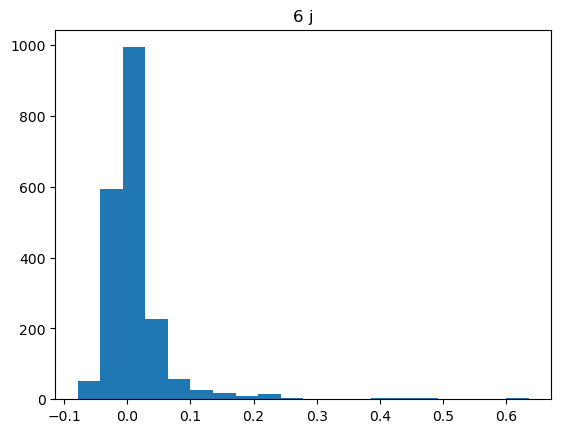

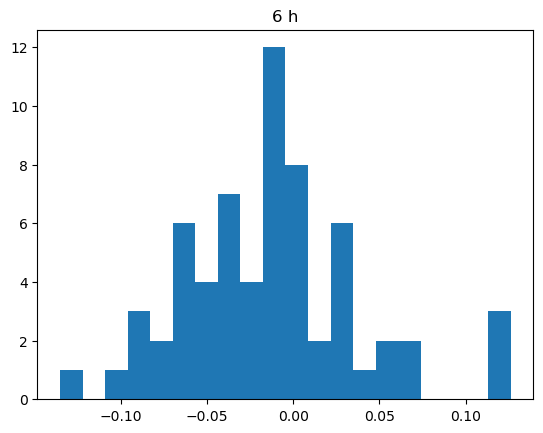

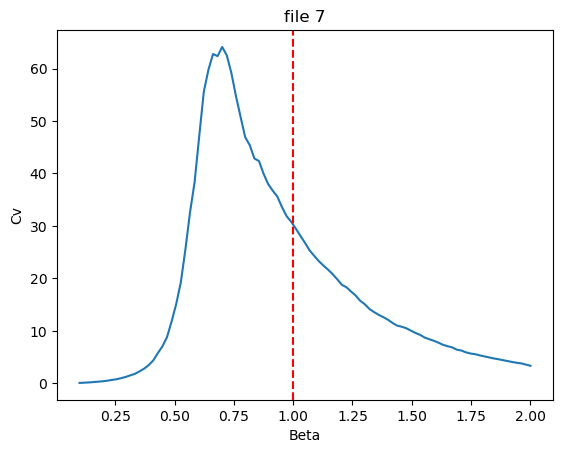

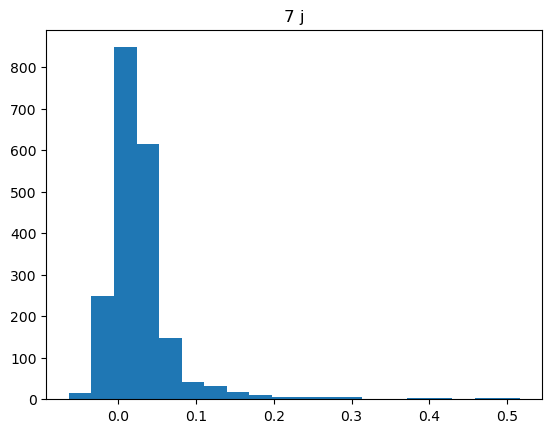

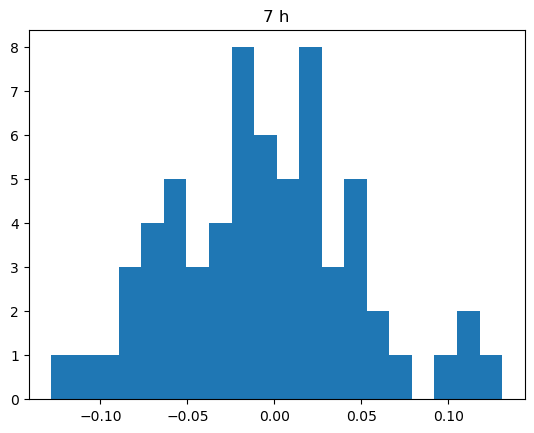

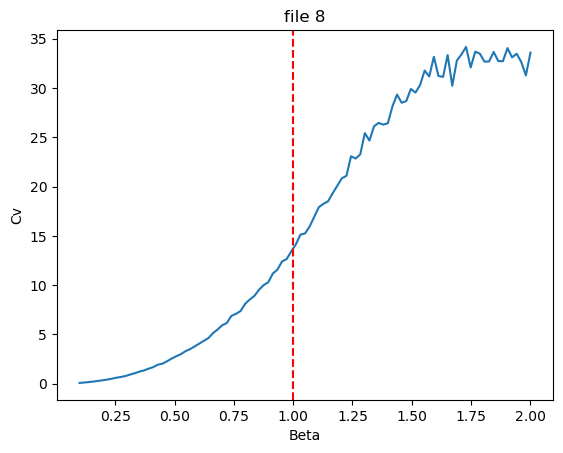

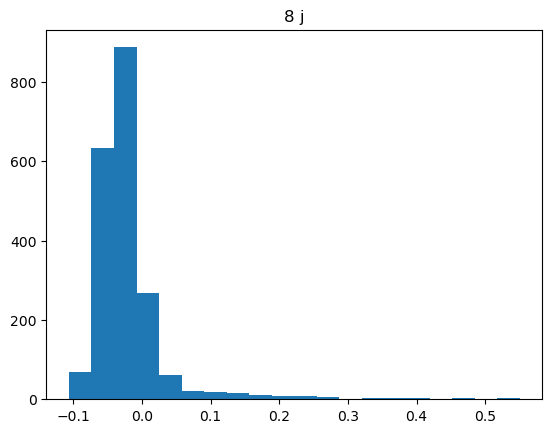

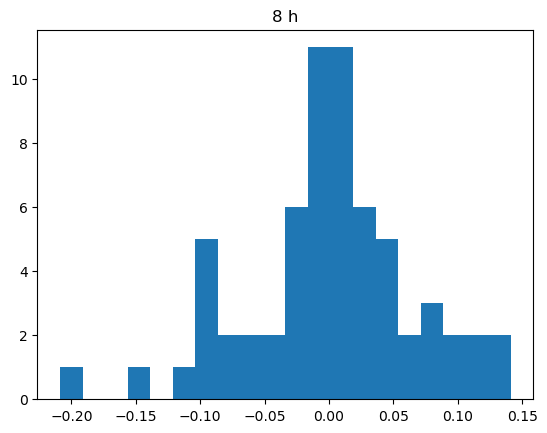

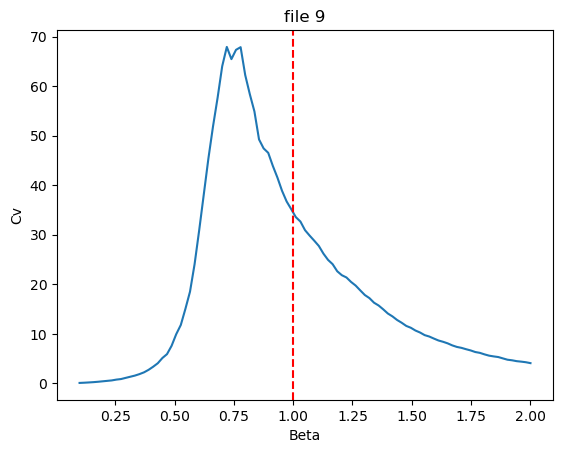

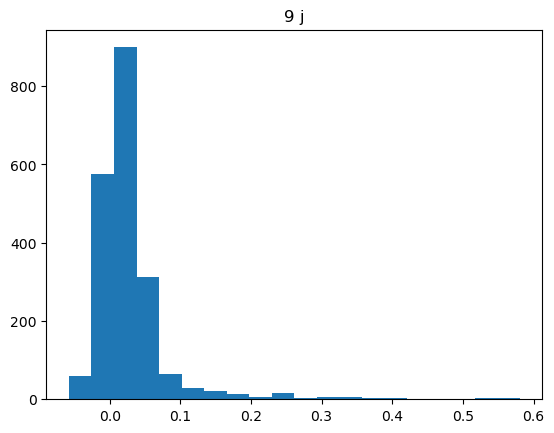

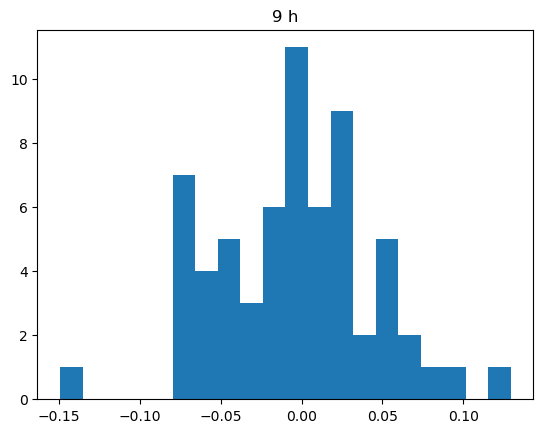

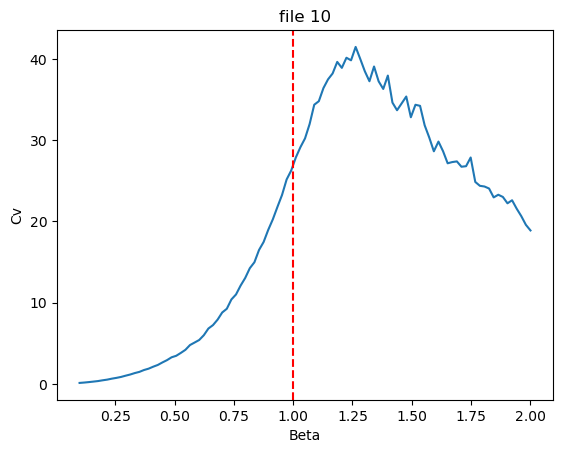

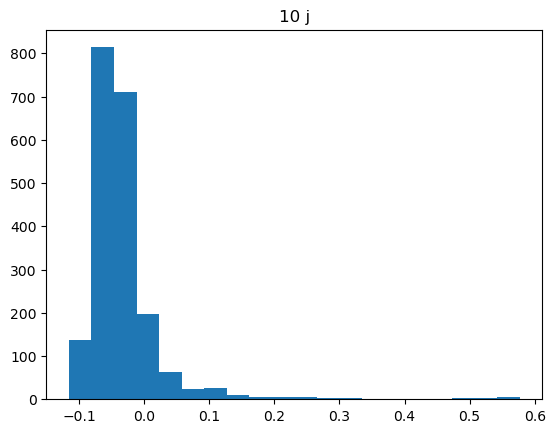

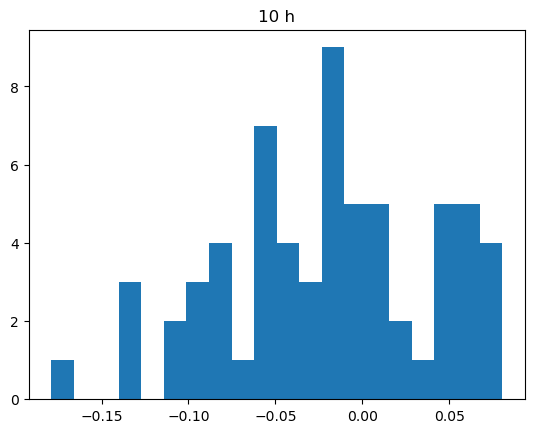

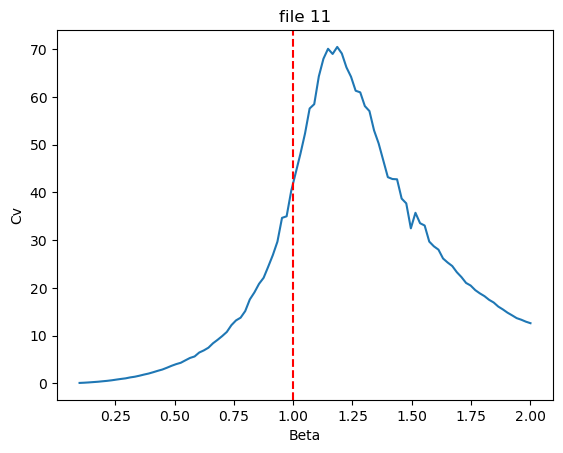

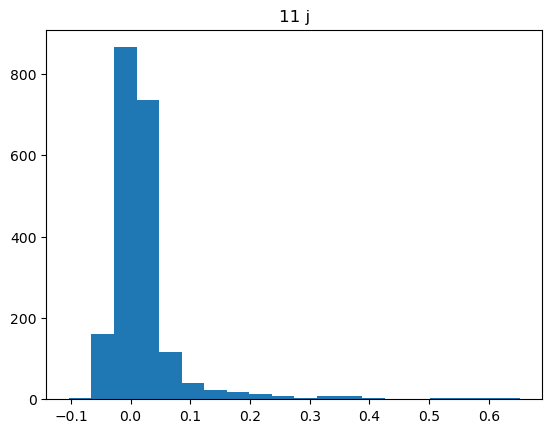

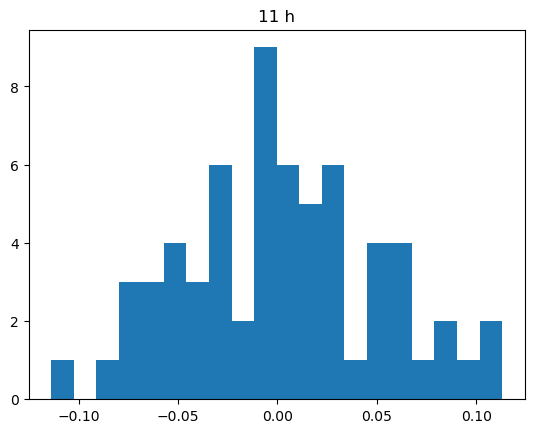

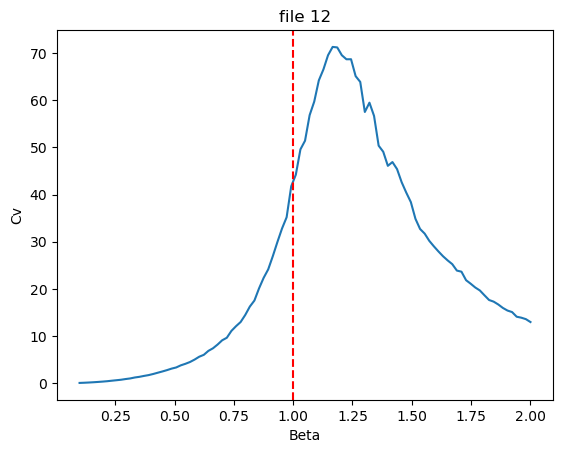

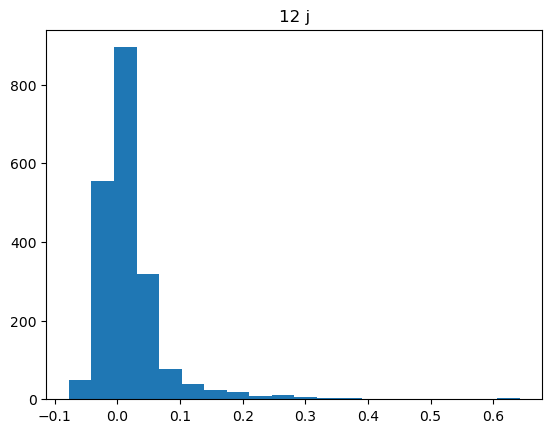

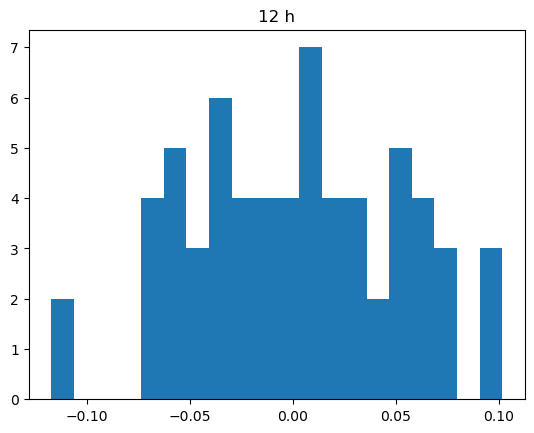

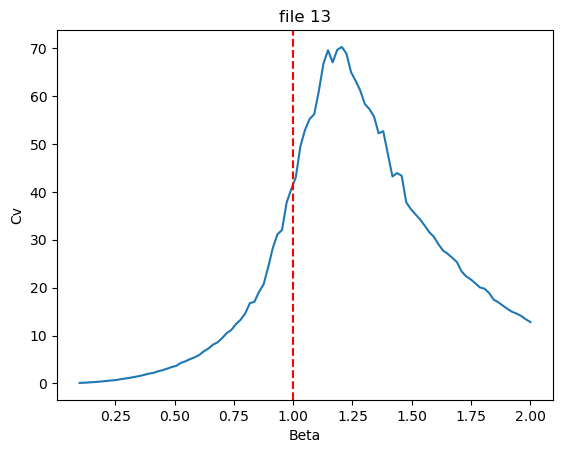

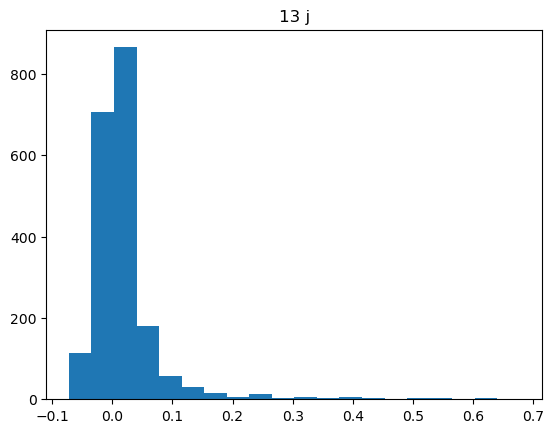

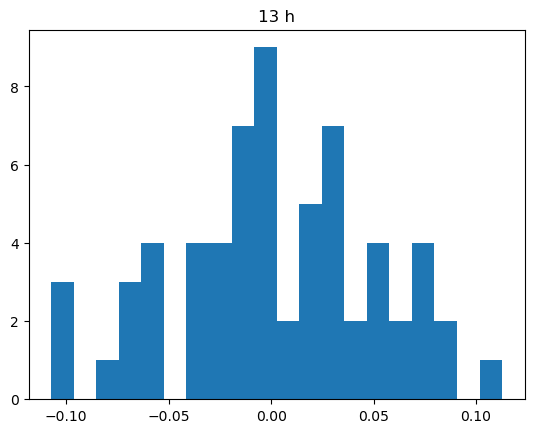

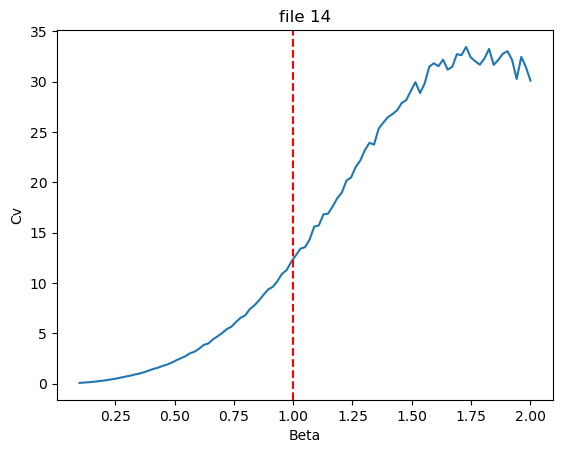

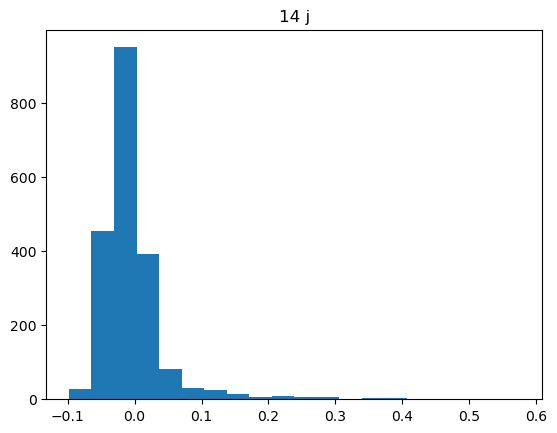

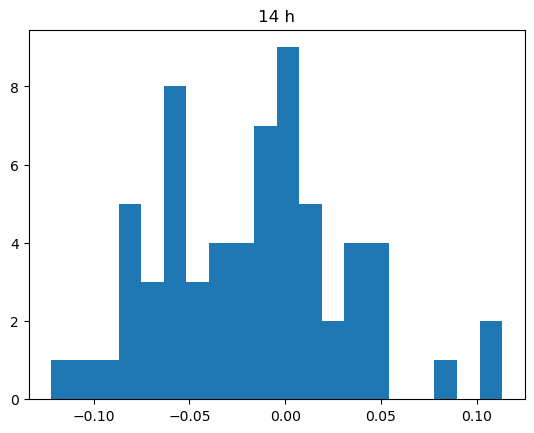

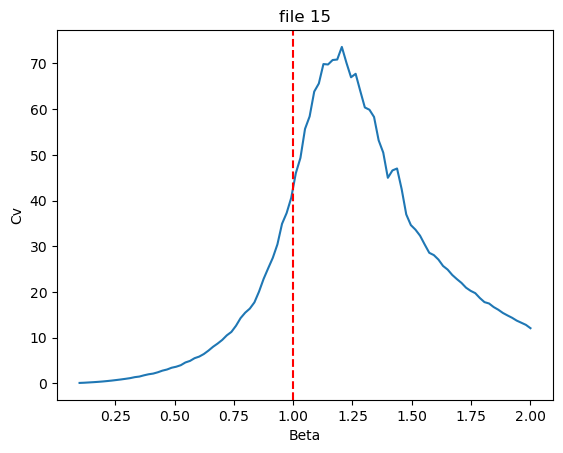

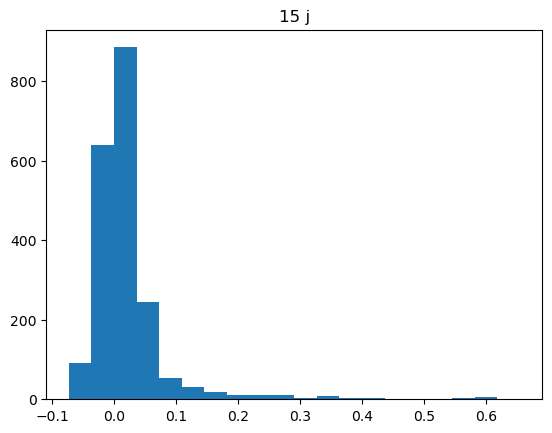

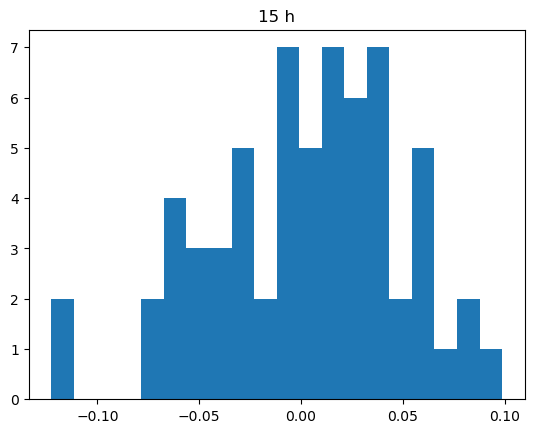

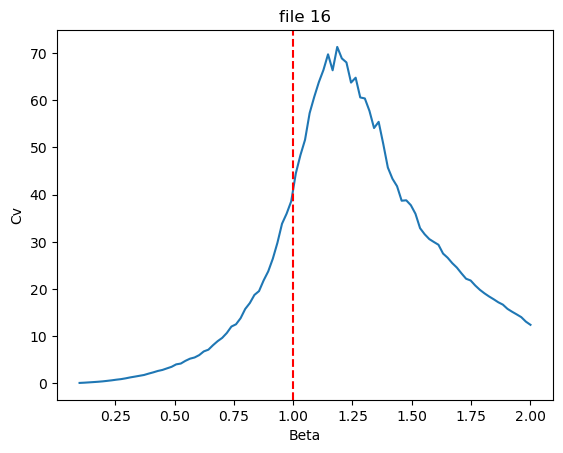

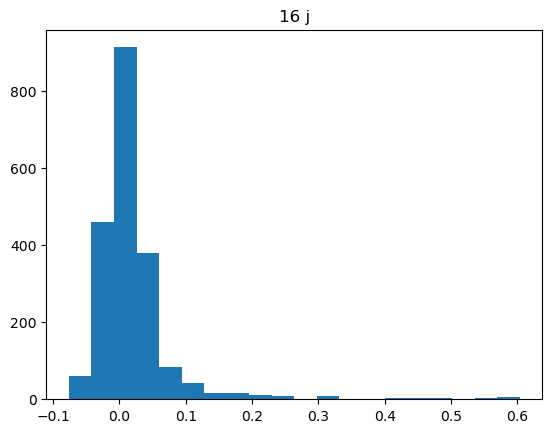

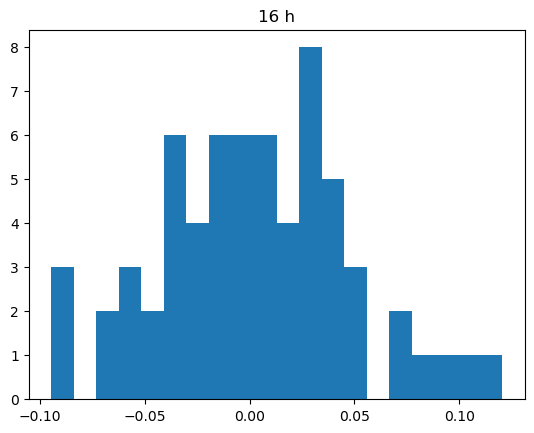

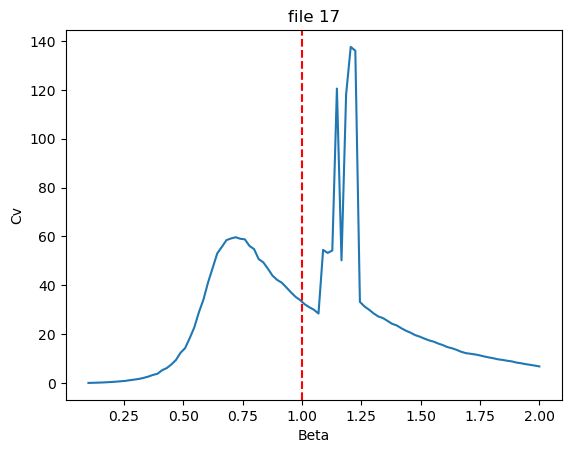

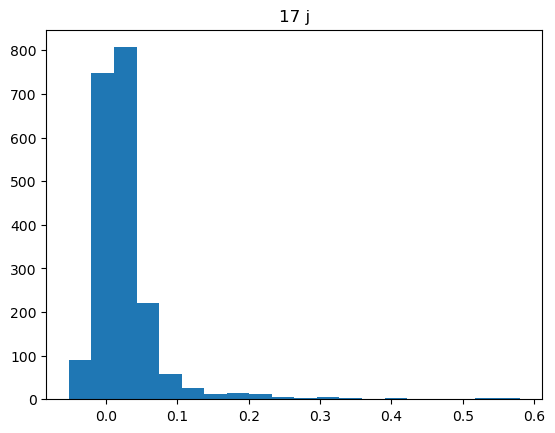

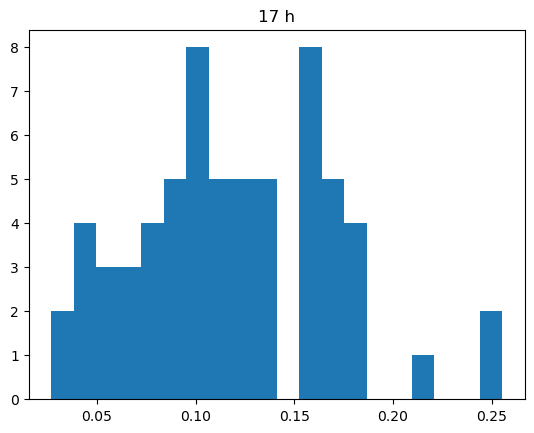

<Figure size 640x480 with 0 Axes>

In [16]:
cvss=[]
for i in range(18):
    # print(i)
    data = np.load(f'blresult/blresult_{i}.npz',allow_pickle=True)
# lst = data.files
# print(lst)
# for item in lst:
#     # print(item)
#     print(data[item])
    state=data['state'][()]
    h=state['hjbest'][:64]
    j=state['hjbest'][64:]
    filename=f'input/input_file{i}.h5'
    with h5py.File(filename, "w") as f:
    # f.create_dataset('h',data=h)
    # f.create_dataset('j',data=j)
        f['h']=h
        f['j']=j
    # call sspin
    cvs=[]
    niter=10000
    betas=np.linspace(0.1,2,99)
    for beta in betas:
        prmf=filename
        datf = f'output/output_{i}_{beta:.04g}.h5'
        
        system(f'nice -n +20 ./sspin1 {prmf} {datf} {niter} --beta={beta:.04g}')
        
        with h5py.File(datf, "r") as f:
            E = f['result1']['aE'][()]
            E2 =f['result1']['aE2'][()]
            cnt=f['result1']['cnt'][()]
            cv=beta*beta*(E2/cnt-E*E/cnt/cnt)
            # print(list(f['result1']['aC']))
            cvs.append(cv)
    cvss.append(cvs)

    plt.plot(betas,cvss[i])
    plt.title(f'file {i}')
    plt.xlabel('Beta')
    plt.ylabel('Cv')
    plt.axvline(1,color = 'r',ls='--')
    plt.figure()
    plt.hist(j,bins=20)
    plt.title(f'{i}'+' j')
    plt.figure()
    plt.hist(h,bins=20)
    plt.title(f'{i}'+' h')
    plt.figure()
# print((state))


In [18]:
# error=data['error'][()]
# print(error['mses'])
# plt.plot(error['mses'])
# plt.xlabel('time')
# plt.ylabel('error')
# plt.yscale('log')
# plt.xscale('log')

<Figure size 640x480 with 0 Axes>

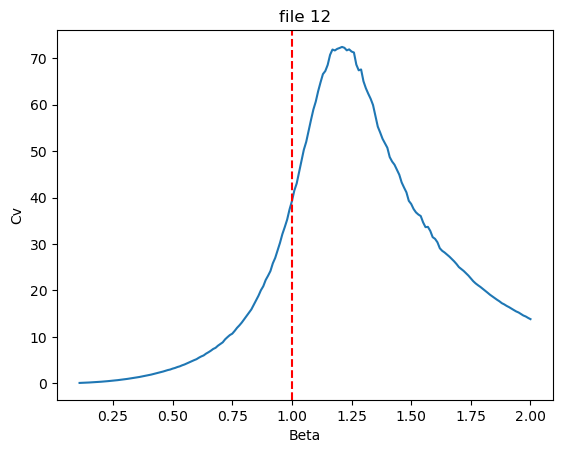

<Figure size 640x480 with 0 Axes>

In [42]:

data = np.load(f'blresult/blresult_12.npz',allow_pickle=True)
# lst = data.files
# print(lst)
# for item in lst:
#     # print(item)
#     print(data[item])
state=data['state'][()]
h=state['hjbest'][:64]
j=state['hjbest'][64:]
filename=f'input/input_file12.h5'
with h5py.File(filename, "w") as f:
# f.create_dataset('h',data=h)
# f.create_dataset('j',data=j)
    f['h']=h
    f['j']=j
# call sspin
cv=[]
Mlist=[]
dMdT=[]
niter=100000
beta=0.1
aC=[]
beta_interval=0.01
betas=[]
while beta<2:
    prmf=filename
    datf = f'output/output_12_{beta:.04g}.h5'
    system(f'nice -n +20 ./sspin1 {prmf} {datf} {niter} --beta={beta:.04g}')
    with h5py.File(datf, "r") as f:
        E = f['result1']['aE'][()]
        E2 =f['result1']['aE2'][()]
        M=f['result1']['aM'][()]
        M2=f['result1']['aM2'][()]
        ME=f['result1']['aME'][()]
        cnt=f['result1']['cnt'][()]
        cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
        dMdT.append(beta*beta*(ME/cnt-M*E/cnt/cnt))
        Mlist.append(M/cnt)
        # print(list(f['result1']['aC']))


    beta=beta+beta_interval
    betas.append(beta)
plt.plot(betas,cv)
plt.title(f'file 12')
plt.xlabel('Beta')
plt.ylabel('Cv')
plt.axvline(1,color = 'r',ls='--')
plt.figure()

<Figure size 640x480 with 0 Axes>

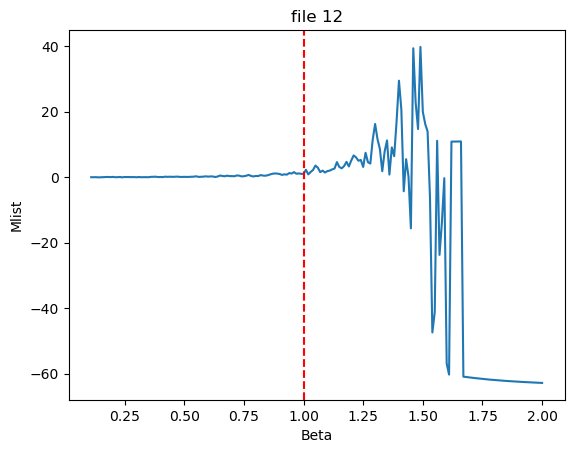

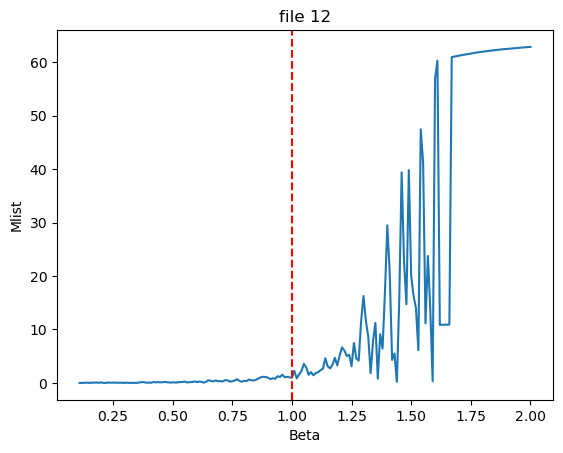

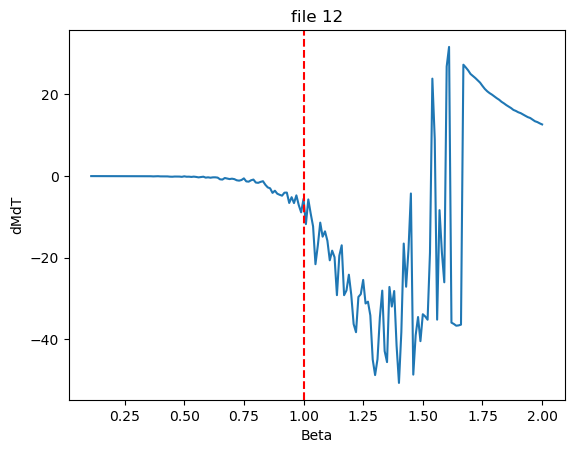

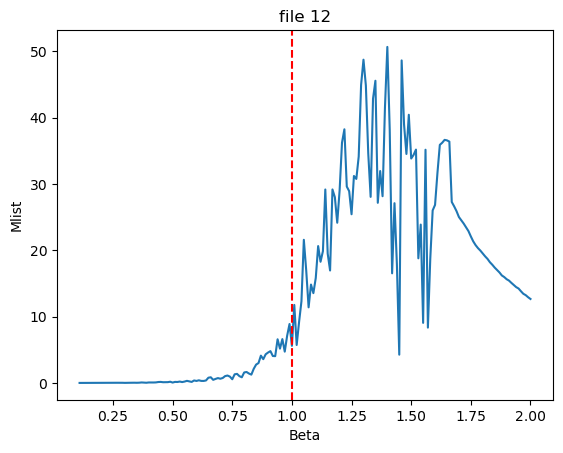

<Figure size 640x480 with 0 Axes>

In [46]:
Mlist_abs=[abs(M) for M in Mlist]
dMdT_abs=[abs(M) for M in dMdT]
plt.plot(betas,Mlist)
plt.title('file 12')
plt.xlabel('Beta')
plt.ylabel('Mlist')
plt.axvline(1,color = 'r',ls='--')
plt.figure()
plt.plot(betas,Mlist_abs)
plt.title('file 12')
plt.xlabel('Beta')
plt.ylabel('Mlist')
plt.axvline(1,color = 'r',ls='--')
plt.figure()
plt.plot(betas,dMdT)
plt.title('file 12')
plt.xlabel('Beta')
plt.ylabel('dMdT')
plt.axvline(1,color = 'r',ls='--')
plt.figure()
plt.plot(betas,dMdT_abs)
plt.title('file 12')
plt.xlabel('Beta')
plt.ylabel('Mlist')
plt.axvline(1,color = 'r',ls='--')
plt.figure()

In [30]:
index=cv.index(max(cv))
critical_beta=betas[index]

filename=f'input/input_file12.h5'
niter=100000

prmf=filename
datf = f'output/output_12_{critical_beta:.04g}_{niter}.h5'
system(f'nice -n +20 ./sspin1 {prmf} {datf} {niter} --beta={critical_beta}')
with h5py.File(datf, "r") as f:
    E = f['result1']['aE'][()]
    E2 =f['result1']['aE2'][()]
    M=f['result1']['aM'][()]
    M2=f['result1']['aM2'][()]
    ME=f['result1']['aME'][()]
    cnt=f['result1']['cnt'][()]
    cv.append(beta*beta*(E2/cnt-E*E/cnt/cnt))
    # m=list(f['result1']['aM'])
    aC=list(f['result1']['aC'])

# print(len(m))
print(len(aC))



2016


In [33]:
print(M)
print(E)

469702.0
-2484015.3013549224


In [9]:
filename=f'input/input_file12.h5'
with h5py.File(filename, "r") as f:
    j_distribution=f['j'][()]
print(j_distribution.shape)

(2016,)


In [4]:
lin_size=32
Distance=np.zeros((lin_size*lin_size,lin_size*lin_size))
for i in range(lin_size):
    for j in range(lin_size):
        # Id1
        for k in range(lin_size):
            for l in range(lin_size):
                # Id2
                X_dis=abs(i-k)
                Y_dis=abs(l-j)
                # periodic boundary
                if(X_dis>=lin_size/2):
                    X_dis=lin_size-X_dis
                if(Y_dis>=lin_size/2):
                    Y_dis=lin_size-Y_dis
                Distance[i*lin_size+j,k*lin_size+l]=(X_dis**2+Y_dis**2)**0.5

In [49]:
print(Distance)

[[0.         1.         2.         ... 3.16227766 2.23606798 1.41421356]
 [1.         0.         1.         ... 4.12310563 3.16227766 2.23606798]
 [2.         1.         0.         ... 5.09901951 4.12310563 3.16227766]
 ...
 [3.16227766 4.12310563 5.09901951 ... 0.         1.         2.        ]
 [2.23606798 3.16227766 4.12310563 ... 1.         0.         1.        ]
 [1.41421356 2.23606798 3.16227766 ... 2.         1.         0.        ]]


In [7]:
Dis_list=[]
filename=f'selection_mc/selection_mc_12.h5'
with h5py.File(filename, "r") as f:
    chosen_indices=list(f['chosen_indices'][:])
    Correlaiton_list=list(f['c'][:])
    for index1 in range(len(chosen_indices)):
        for index2 in range(index1):
            Dis_list.append(Distance[chosen_indices[index1],chosen_indices[index2]])

Text(0.5, 1.0, 'J distribution')

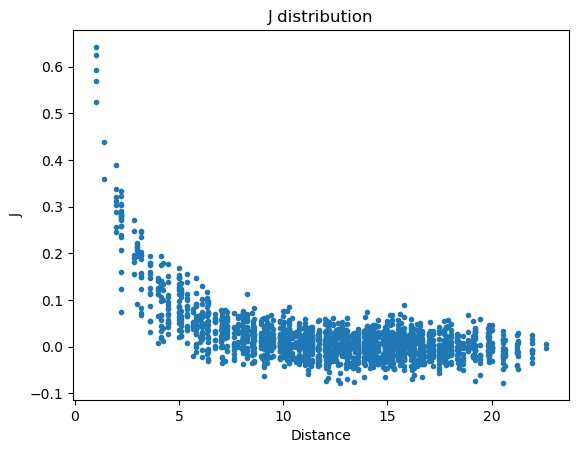

In [10]:
# plot J distribution
plt.plot(Dis_list,j_distribution,'.')
plt.xlabel('Distance')
plt.ylabel('J')
plt.title('J distribution')

In [26]:
def Average_list(D_list=[],j_list=[]):
    Nor_J=[]
    Nor_D=[]
    Nor_I=[]
    for i in range(len(D_list)):
        a=0
        for j in range(len(Nor_D)):
            if(D_list[i]==Nor_D[j]):
                Nor_I[j]+=1
                Nor_J[j]+=j_list[i]
                a=a+1
        if(a==0):
            Nor_D.append(D_list[i])
            Nor_I.append(1)
            Nor_J.append(j_list[i])
    for i in range(len(Nor_J)):
        Nor_J[i]=Nor_J[i]/Nor_I[i]
    return Nor_D,Nor_J
            
                

Text(0.5, 1.0, 'averaged J distribution')

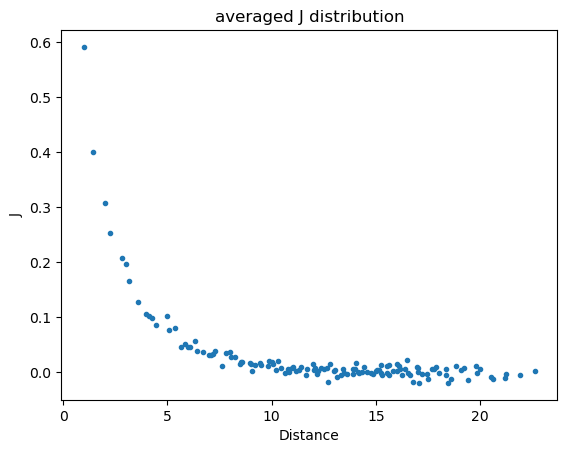

In [28]:
Dlst,Jlst=Average_list(Dis_list,j_distribution)
plt.plot(Dlst,Jlst,'.')
plt.xlabel('Distance')
plt.ylabel('J')
plt.title('averaged J distribution')

Text(0.5, 1.0, 'correlation of sspin')

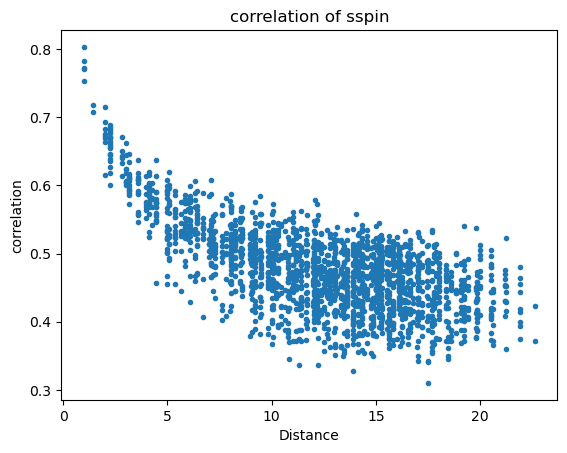

In [22]:
New_list=[item/niter for item in aC]
plt.plot(Dis_list,New_list,'.')
plt.xlabel('Distance')
plt.ylabel('correlation')
plt.title('correlation of sspin')

Text(0.5, 1.0, 'average correlation of sspin')

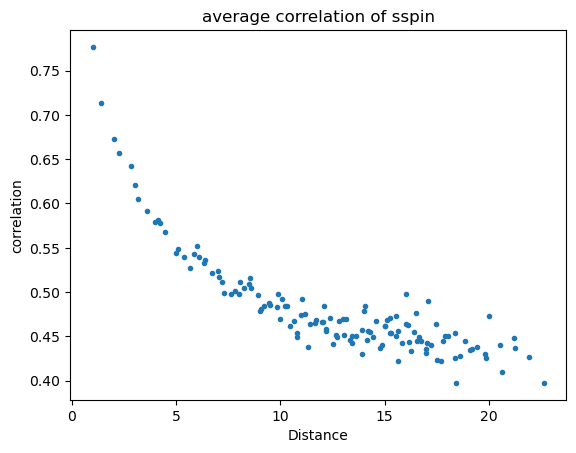

In [29]:
NewDis,New_cor=Average_list(Dis_list,New_list)
plt.plot(NewDis,New_cor,'.')
plt.xlabel('Distance')
plt.ylabel('correlation')
plt.title('average correlation of sspin')

In [24]:
# betas=np.linspace(0.1,2,20)
# print(betas)
betas = [0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]
cvs=[]
for beta in betas:
    print(f'output-{beta}.h5')
    with h5py.File(f'output-{beta}.h5', "r") as f:
        E = f['result1']['aE'][()]
        E2 =f['result1']['aE2'][()]
        cnt=f['result1']['cnt'][()]
        cv=E2/cnt-E*E/cnt/cnt
        # print(list(f['result1']['aC']))
        cvs.append(cv)


output-0.1.h5
output-0.2.h5
output-0.3.h5
output-0.4.h5
output-0.5.h5
output-0.6.h5
output-0.7.h5
output-0.8.h5
output-0.9.h5
output-1.h5
output-1.1.h5
output-1.2.h5
output-1.3.h5
output-1.4.h5
output-1.5.h5
output-1.6.h5
output-1.7.h5
output-1.8.h5
output-1.9.h5
output-2.h5


Text(0, 0.5, 'Cv')

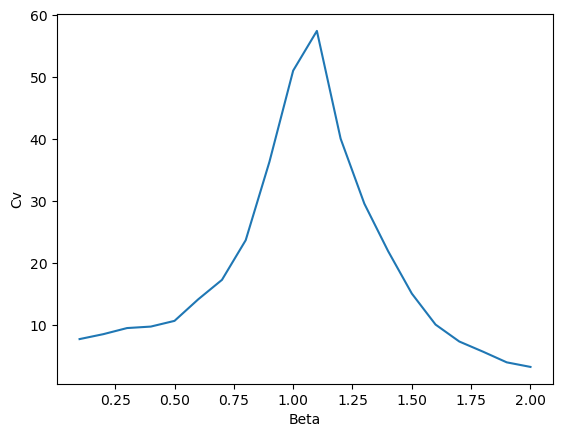

In [25]:
plt.plot(betas,cvs)
plt.xlabel('Beta')
plt.ylabel('Cv')



In [39]:
print(state[()])

print(np.ndim(state))
print(state.item())

{'hj': array([ -63327.58333333,   34920.75      , -119500.        , ...,
        198953.        ,  216039.66666666,  263882.33333334]), 'niter': 1024, 'lr': 0.10416666666666667, 'last_grad': array([ -593.,   327., -1119., ...,  1863.,  2023.,  2471.]), 'last_norm': 97005.76197319415, 'mc_ref': array([ -594.,   326., -1120., ...,  1864.,  2024.,  2472.]), 'hjbest': array([ -63265.8125,   34886.6875, -119383.4375, ...,  198758.9375,
        215828.9375,  263624.9375])}
0
{'hj': array([ -63327.58333333,   34920.75      , -119500.        , ...,
        198953.        ,  216039.66666666,  263882.33333334]), 'niter': 1024, 'lr': 0.10416666666666667, 'last_grad': array([ -593.,   327., -1119., ...,  1863.,  2023.,  2471.]), 'last_norm': 97005.76197319415, 'mc_ref': array([ -594.,   326., -1120., ...,  1864.,  2024.,  2472.]), 'hjbest': array([ -63265.8125,   34886.6875, -119383.4375, ...,  198758.9375,
        215828.9375,  263624.9375])}


In [13]:
filename = "mag_corre_file.h5"
# f1 = h5py.File(filename,'r+')  
with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    print(f['aC'].shape)
    print(f['mag'].shape)
    # print(max(f['C'][:]))
    # index = f['C'][:].argmax()
    # print(index)
    # print(f['T'][index])
    # print(f['T'][:])

Keys: <KeysViewHDF5 ['aC', 'mag', 'result1']>
(2016,)
(64,)


In [81]:
print(cvs[:])

[<Closed HDF5 dataset>, <Closed HDF5 dataset>, <Closed HDF5 dataset>, <Closed HDF5 dataset>]
